In [ ]:
import argparse
import math
import warnings
import numpy as np
import pandas as pd
from pandas import datetime
from matplotlib import pyplot


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 

series = pd.read_csv('drive/MyDrive/Colab Notebooks/PeMS_cleaned1.csv', encoding='utf-8').fillna(0)


 


In [ ]:
series

,Timestamp,AggFlow
0,1/1/2021 0:00,110
1,1/1/2021 0:05,117
2,1/1/2021 0:10,120
3,1/1/2021 0:15,113
4,1/1/2021 0:20,131
...,...,...
91579,29/11/2021 23:35,78
91580,29/11/2021 23:40,79
91581,29/11/2021 23:45,77
91582,29/11/2021 23:50,75


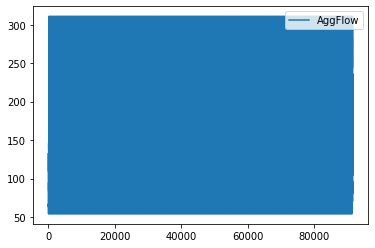

<Figure size 7200x432 with 0 Axes>

In [ ]:
series.plot()
pyplot.figure(figsize=(100,6))
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


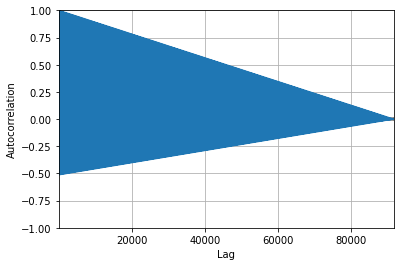

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
def parser(x):
	return datetime.strptime(x, '%d/%m/%Y %H:%M')
 
series = read_csv('drive/MyDrive/Colab Notebooks/PeMS_cleaned1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

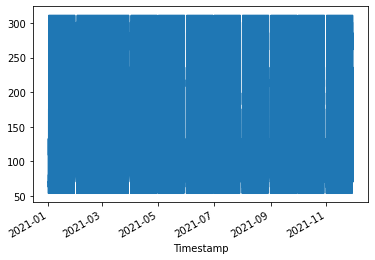

In [ ]:
series.plot()
pyplot.show()

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from matplotlib import pyplot
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

                             ARIMA Model Results                              
Dep. Variable:              D.AggFlow   No. Observations:                91583
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -413305.498
Method:                       css-mle   S.D. of innovations             22.064
Date:                Thu, 05 May 2022   AIC                         826624.996
Time:                        21:22:27   BIC                         826690.971
Sample:                    01-31-2021   HQIC                        826645.098
                         - 11-30-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0004      0.058     -0.007      0.994      -0.115       0.114
ar.L1.D.AggFlow    -0.1364      0.003    -41.477      0.000      -0.143      -0.130
ar.L2.D.AggFlow    -0.0112      

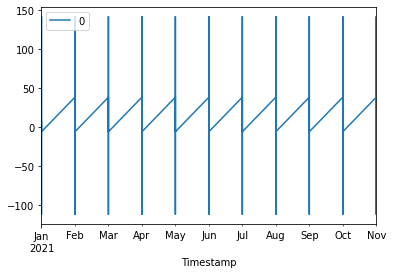

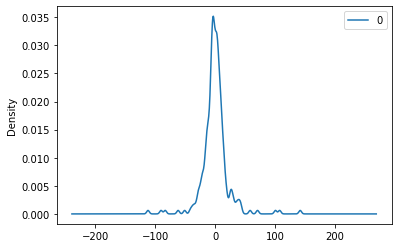

                  0
count  91583.000000
mean       0.000023
std       22.064565
min     -111.907640
25%       -7.989522
50%       -0.790213
75%        7.311732
max      141.763682


In [ ]:
from matplotlib import pyplot
# load dataset

def parser(x):
	return datetime.strptime(x, '%d/%m/%Y %H:%M')
 
series = read_csv('drive/MyDrive/Colab Notebooks/PeMS_cleaned1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())




In [ ]:
def parser(x):
	return datetime.strptime(x, '%d/%m/%Y %H:%M')
 
series = read_csv('drive/MyDrive/Colab Notebooks/PeMS_cleaned1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
#size = int(len(X) * 0.80)
size = 74880
train, test, test1 = X[0:size], X[size:len(X)], X[74880:75170]



In [ ]:
train[74870:74880]

array([ 83, 123, 106,  96,  79,  78,  79,  77,  75,  71])

In [ ]:
test1

array([110, 117, 120, 113, 131, 133, 113, 114, 108, 103,  92,  84,  98,
        75,  84,  87,  81,  78,  77,  79,  93,  81,  77,  84,  78,  63,
        71,  67,  71,  66,  58,  65,  63,  62,  54,  58,  61,  59,  63,
        66,  63,  69,  60,  70,  73,  78,  70,  67,  64,  67,  68,  64,
        70,  71,  66,  74,  76,  78,  81,  66,  74,  70,  89,  95,  95,
        84, 112, 120, 114, 146, 121, 107, 109,  96, 105,  95, 103, 115,
       116, 106, 104, 105, 131, 100, 104, 114,  98, 113, 114, 106, 117,
       129, 136, 144, 136, 133, 121, 103, 136, 133, 176, 168, 164, 199,
       132, 154, 155, 158, 164, 163, 148, 134, 145, 142, 160, 154, 182,
       278, 279, 258, 271, 248, 264, 255, 277, 271, 235, 236, 295, 272,
       274, 256, 268, 268, 242, 289, 300, 262, 265, 279, 281, 276, 284,
       258, 289, 258, 263, 277, 297, 285, 298, 301, 273, 192, 189, 166,
       239, 274, 257, 270, 267, 239, 128, 121, 128, 123, 123, 132, 115,
       126, 120, 108, 117, 121, 261, 244, 271, 274, 282, 254, 27

In [ ]:
series[74870:74881]
series[75180:75181]

Timestamp
2021-10    98
Freq: M, Name: AggFlow, dtype: int64

In [ ]:
history = [x for x in train]
predictions = list()
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit()
!mkdir -p saved_model
model_fit.save('saved_model/my_model.pkl') 

In [ ]:
!ls 'saved_model'
!ls saved_model/my_model

my_model.pkl
ls: cannot access 'saved_model/my_model': No such file or directory


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [ ]:
loaded = ARIMAResults.load('saved_model/my_model.pkl')

In [ ]:
len(test)

16704

In [ ]:
test2 = test[5001:10000]

In [ ]:
len(test2)

4999

In [ ]:
"""
for t in range(len(test2)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test2[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
"""

predicted=106.617891, expected=154.000000
predicted=147.213694, expected=155.000000
predicted=154.160886, expected=158.000000
predicted=158.863861, expected=164.000000
predicted=162.700193, expected=163.000000
predicted=158.819481, expected=148.000000
predicted=149.984804, expected=134.000000
predicted=135.671812, expected=145.000000
predicted=142.903590, expected=142.000000
predicted=142.463817, expected=160.000000
predicted=159.413223, expected=154.000000
predicted=155.750264, expected=182.000000
predicted=177.458557, expected=278.000000
predicted=264.509192, expected=279.000000
predicted=276.499841, expected=258.000000
predicted=262.165380, expected=271.000000
predicted=265.121658, expected=248.000000
predicted=241.388993, expected=264.000000
predicted=262.506089, expected=255.000000
predicted=257.574993, expected=277.000000
predicted=273.438062, expected=271.000000
predicted=273.418540, expected=235.000000
predicted=238.855751, expected=236.000000
predicted=236.691423, expected=295

In [ ]:

history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes


Streaming output truncated to the last 5000 lines.
predicted=289.510337, expected=298.000000
predicted=295.890729, expected=301.000000
predicted=298.593136, expected=273.000000
predicted=275.224363, expected=192.000000
predicted=204.355896, expected=189.000000
predicted=188.664694, expected=166.000000
predicted=168.341535, expected=239.000000
predicted=233.374599, expected=274.000000
predicted=276.025869, expected=257.000000
predicted=260.522843, expected=270.000000
predicted=269.821797, expected=267.000000
predicted=259.362721, expected=239.000000
predicted=239.918435, expected=128.000000
predicted=144.845514, expected=121.000000
predicted=121.653136, expected=128.000000
predicted=126.523210, expected=123.000000
predicted=128.162753, expected=123.000000
predicted=134.046943, expected=132.000000
predicted=131.269713, expected=115.000000
predicted=116.622095, expected=126.000000
predicted=125.291301, expected=120.000000
predicted=120.325390, expected=108.000000
predicted=109.261841, exp

In [ ]:
len(predictions)
predictions[582:871]

[array([111.6300836]),
 array([115.93145457]),
 array([115.51642624]),
 array([113.44960906]),
 array([129.22088282]),
 array([131.70584038]),
 array([115.76150186]),
 array([114.48474734]),
 array([106.77269575]),
 array([103.91081206]),
 array([95.40613941]),
 array([85.15716972]),
 array([96.70959375]),
 array([78.55321875]),
 array([84.41194742]),
 array([86.7360563]),
 array([80.93270965]),
 array([80.59322061]),
 array([76.16839331]),
 array([78.51156153]),
 array([91.6887504]),
 array([82.81311615]),
 array([77.91932992]),
 array([82.50383134]),
 array([77.53516591]),
 array([66.43533208]),
 array([70.26919317]),
 array([66.68887853]),
 array([71.43935215]),
 array([67.90553598]),
 array([58.48892363]),
 array([64.3908513]),
 array([62.78973702]),
 array([62.86910462]),
 array([55.73336233]),
 array([56.88518614]),
 array([60.65534309]),
 array([59.52297672]),
 array([63.22203063]),
 array([65.07985736]),
 array([63.16819253]),
 array([68.37782268]),
 array([60.68190214]),
 arra

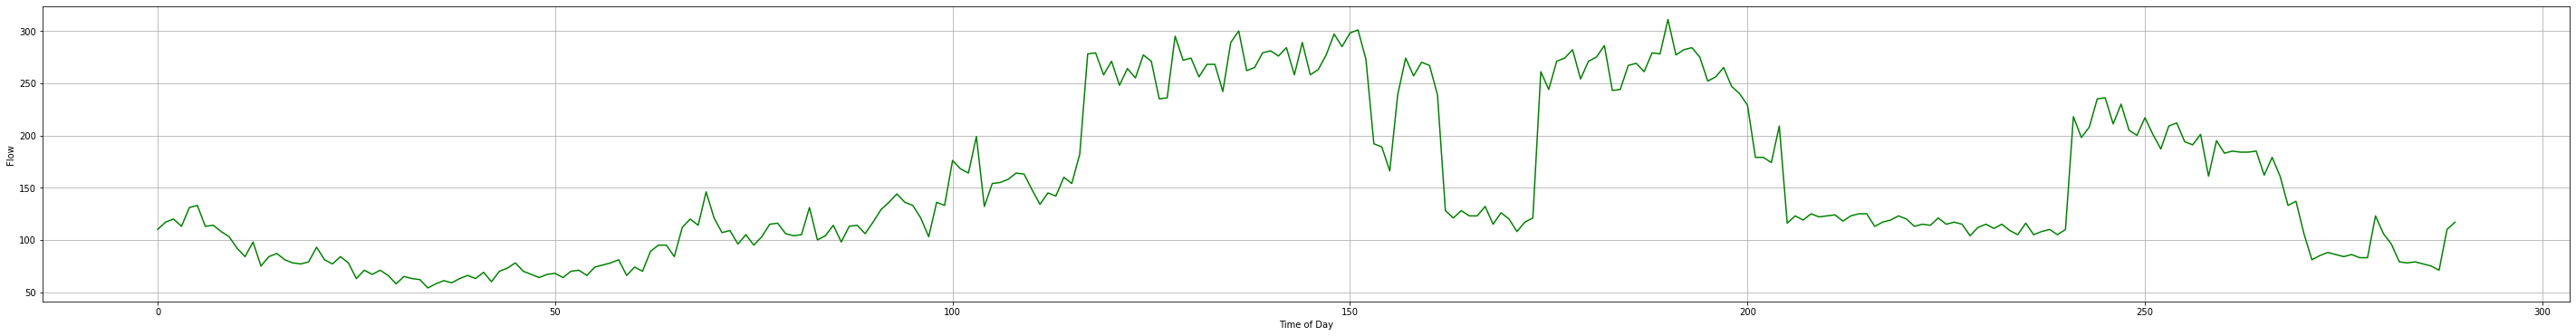

In [ ]:
from math import sqrt
pyplot.figure(figsize=(50,6))
pyplot.plot(test1, color='green')
pyplot.plot(predictions[582:871], color='red')
pyplot.grid(True)
pyplot.xlabel('Time of Day')
pyplot.ylabel('Flow')
pyplot.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test1, predictions[581:871]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 21.987


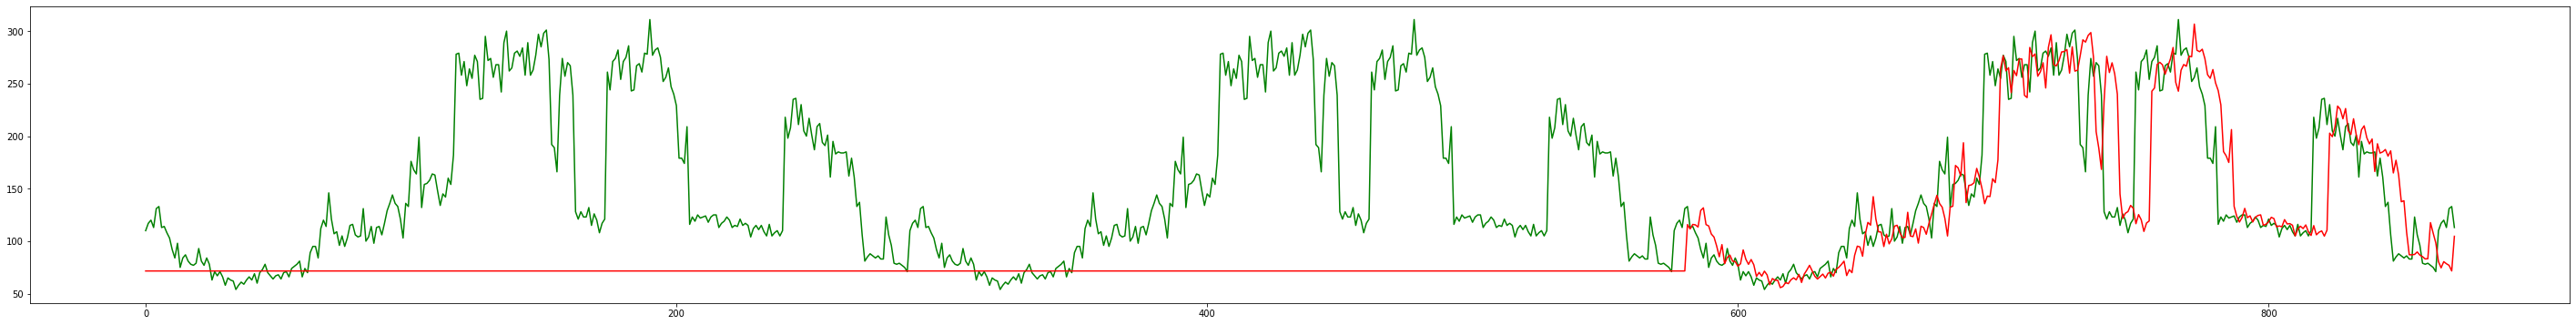

In [ ]:
from math import sqrt
pyplot.figure(figsize=(50,6))
pyplot.plot(test[0:871], color='green')
pyplot.plot(predictions[0:871], color='red')
pyplot.show()

In [ ]:
len(predictions)

871

In [ ]:
import pandas as pd
df = pd.read_csv(r"drive/MyDrive/Colab Notebooks/first5koutput2.csv")
print("pd.DataFrame(" + str(df.values.tolist()) + ", columns=" + str(df.columns.tolist()) + ")")


pd.DataFrame([[289.510337, 298.0], [295.890729, 301.0], [298.593136, 273.0], [275.224363, 192.0], [204.355896, 189.0], [188.664694, 166.0], [168.341535, 239.0], [233.374599, 274.0], [276.025869, 257.0], [260.522843, 270.0], [269.821797, 267.0], [259.362721, 239.0], [239.918435, 128.0], [144.845514, 121.0], [121.653136, 128.0], [126.52321, 123.0], [128.162753, 123.0], [134.046943, 132.0], [131.269713, 115.0], [116.622095, 126.0], [125.291301, 120.0], [120.32539, 108.0], [109.261841, 117.0], [117.294724, 121.0], [119.239032, 261.0], [242.777528, 244.0], [245.792151, 271.0], [268.310045, 274.0], [270.258676, 282.0], [267.91817, 254.0], [258.949566, 271.0], [266.424449, 275.0], [273.488312, 286.0], [284.377971, 243.0], [251.215656, 244.0], [242.764955, 267.0], [262.743447, 269.0], [268.158502, 261.0], [266.51475, 279.0], [276.16963, 278.0], [275.568362, 311.0], [306.683991, 277.0], [281.720464, 282.0], [280.382239, 284.0], [282.77936, 275.0], [273.651929, 252.0], [258.479971, 256.0], [255.

In [ ]:
df.head()

,Predicted,Expected
0,289.510337,298
1,295.890729,301
2,298.593136,273
3,275.224363,192
4,204.355896,189


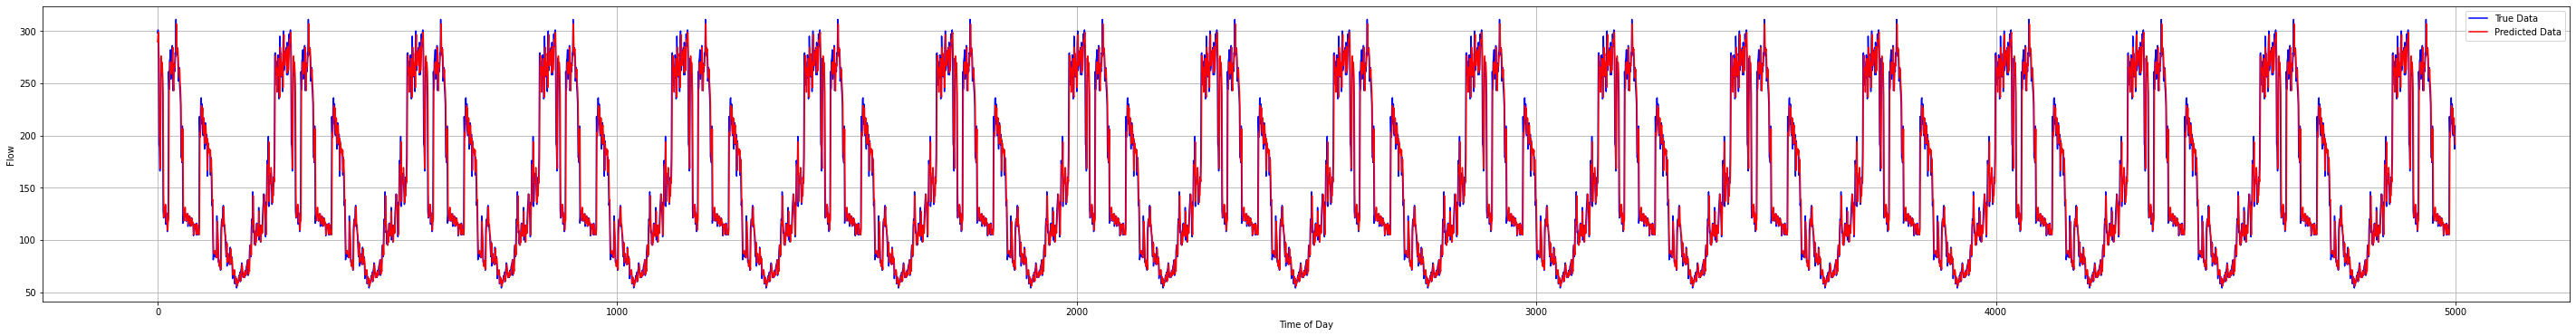

In [ ]:
from math import sqrt
fig = pyplot.figure(figsize=(50,6))
ax = fig.add_subplot(111)
ax.plot(df.Expected, color='Blue',label='True Data')
pyplot.plot(df.Predicted, color='Red',label='Predicted Data' )
pyplot.legend()
pyplot.grid(True)
pyplot.xlabel('Time of Day')
pyplot.ylabel('Flow')
pyplot.show()

In [ ]:
import sklearn.metrics as metrics

def MAPE(y_true, y_pred):
    """Mean Absolute Percentage Error
    Calculate the mape.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    # Returns
        mape: Double, result data for train.
    """

    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape


def eva_regress(y_true, y_pred):
    """Evaluation
    evaluate the predicted resul.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    """

    mape = MAPE(y_true, y_pred)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)

  

  

In [ ]:
eva_regress(df.Expected, df.Predicted)

explained_variance_score:0.910560
mape:8.790843%
mae:13.263835
mse:493.682717
rmse:22.218972
r2:0.910560


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(df.Predicted, df.Expected))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 22.219


In [ ]:
import pandas as pd
df = pd.read_csv(r"drive/MyDrive/Colab Notebooks/first5koutput0Day1F.csv")
print("pd.DataFrame(" + str(df.values.tolist()) + ", columns=" + str(df.columns.tolist()) + ")")


pd.DataFrame([[115.785484, 110.0], [111.630084, 117.0], [115.931455, 120.0], [115.516426, 113.0], [113.449609, 131.0], [129.220883, 133.0], [131.70584, 113.0], [115.761502, 114.0], [114.484747, 108.0], [106.772696, 103.0], [103.910812, 92.0], [95.406139, 84.0], [85.15717, 98.0], [96.709594, 75.0], [78.553219, 84.0], [84.411947, 87.0], [86.736056, 81.0], [80.93271, 78.0], [80.593221, 77.0], [76.168393, 79.0], [78.511562, 93.0], [91.68875, 81.0], [82.813116, 77.0], [77.91933, 84.0], [82.503831, 78.0], [77.535166, 63.0], [66.435332, 71.0], [70.269193, 67.0], [66.688879, 71.0], [71.439352, 66.0], [67.905536, 58.0], [58.488924, 65.0], [64.390851, 63.0], [62.789737, 62.0], [62.869105, 54.0], [55.733362, 58.0], [56.885186, 61.0], [60.655343, 59.0], [59.522977, 63.0], [63.222031, 66.0], [65.079857, 63.0], [63.168193, 69.0], [68.377823, 60.0], [60.681902, 70.0], [68.571846, 73.0], [72.552518, 78.0], [76.981321, 70.0], [71.774939, 67.0], [66.539018, 64.0], [63.964293, 67.0], [66.237437, 68.0], [

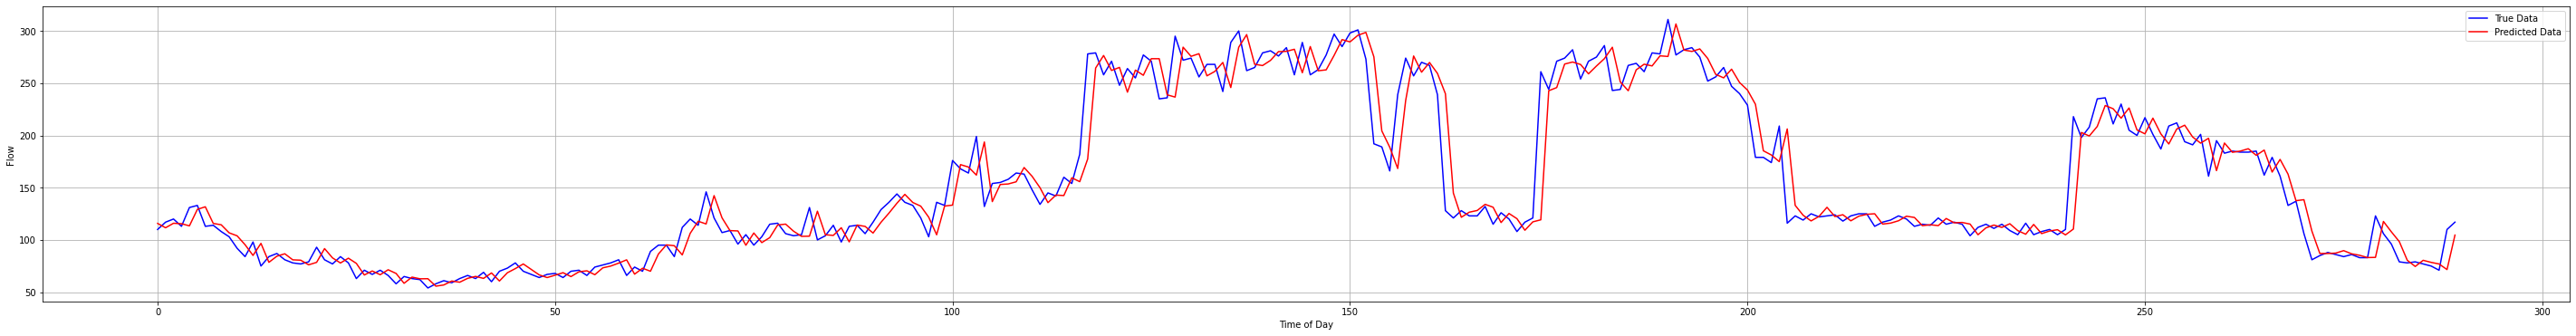

In [ ]:
from math import sqrt
fig = pyplot.figure(figsize=(50,6))
ax = fig.add_subplot(111)
ax.plot(df.Expected, color='Blue',label='True Data')
pyplot.plot(df.Predicted, color='red',label='Predicted Data' )
pyplot.legend()
pyplot.grid(True)
pyplot.xlabel('Time of Day')
pyplot.ylabel('Flow')
pyplot.show()
